<a href="https://colab.research.google.com/github/ajipurnama25/coba/blob/main/analyst_data_customer_shoping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/sample_data/customer_shopping_data.csv")
df.head(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [ ]:
df.count()

invoice_no        99457
customer_id       99457
gender            99457
age               99457
category          99457
quantity          99457
price             99457
payment_method    99457
invoice_date      99457
shopping_mall     99457
dtype: int64

In [ ]:
df['gender'].count()

99457

In [ ]:
# describe digunakan untuk menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [ ]:
df.shape

(99457, 10)

In [ ]:
df['gender'].head()

0    Female
1      Male
2      Male
3    Female
4    Female
Name: gender, dtype: object

In [ ]:
df.nunique()

invoice_no        99457
customer_id       99457
gender                2
age                  52
category              8
quantity              5
price                40
payment_method        3
invoice_date        797
shopping_mall        10
dtype: int64

# **1. Demographic Analysis:**

In [ ]:
# Analytics gender customers
gender = df.groupby('gender')['gender'].value_counts()
gender

gender  gender
Female  Female    59482
Male    Male      39975
Name: gender, dtype: int64

In [ ]:
print(df['age_group'])

0        (25, 35]
1        (18, 25]
2        (18, 25]
3        (65, 75]
4        (45, 55]
           ...   
99452    (35, 45]
99453    (25, 35]
99454    (55, 65]
99455    (55, 65]
99456    (35, 45]
Name: age_group, Length: 99457, dtype: category
Categories (8, interval[int64, right]): [(18, 25] < (25, 35] < (35, 45] < (45, 55] < (55, 65] <
                                         (65, 75] < (75, 85] < (85, 100]]


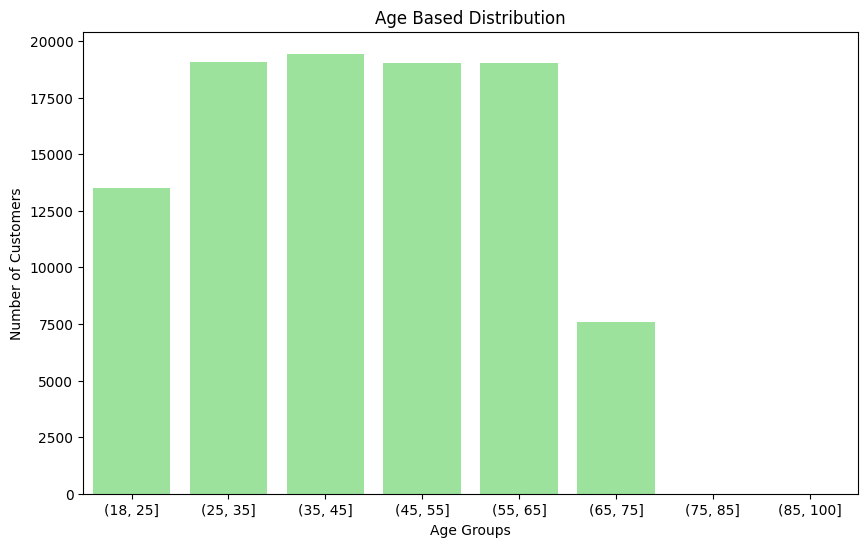


Average age of customers: 43
Aveage age group: (35, 45]


In [ ]:
age_bins = [18,25,35,45,55,65,75,85,100]    #Creating age bins
df['age_group'] = pd.cut(df['age'], bins = age_bins)

age_distribution = df['age_group'].value_counts()

plt.figure(figsize = (10,6))

sns.barplot(x=age_distribution.index, y = age_distribution.values, color = 'lightgreen')
plt.xlabel('Age Groups')
plt.ylabel('Number of Customers')
plt.title('Age Based Distribution')
plt.xticks(rotation= 0)
plt.show()
print()
print(f"Average age of customers: {df['age'].mean():.0f}")
print(f"Aveage age group: {df['age_group'].mode()[0]}")

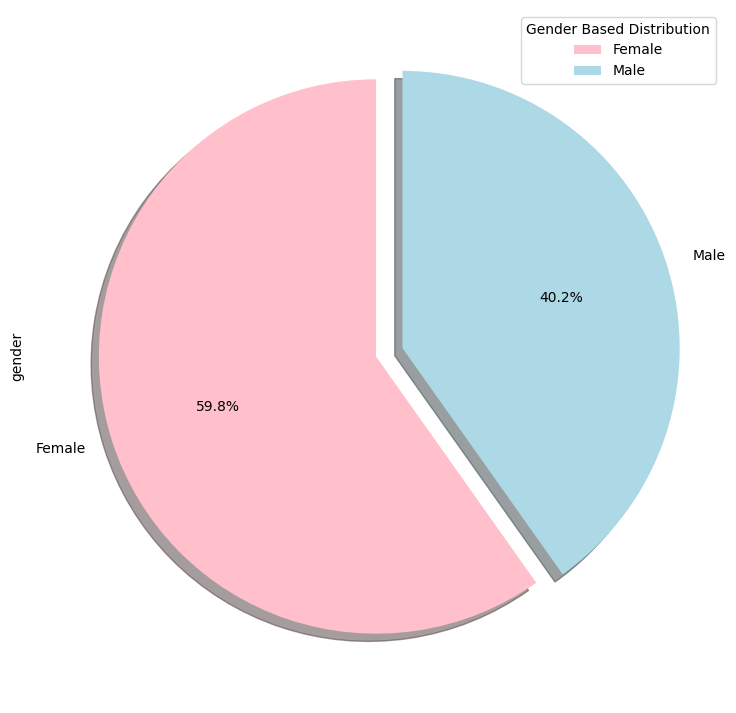

In [ ]:
# Distribution of customer based on Gender

df_gbd = df['gender'].value_counts()
plt.figure(figsize=(9, 9))
df_gbd.plot(kind='pie', autopct='%1.1f%%', startangle= 90, explode = [0, 0.1], shadow = True, colors = ['pink', 'lightblue'])
plt.legend(title='Gender Based Distribution')

plt.show()

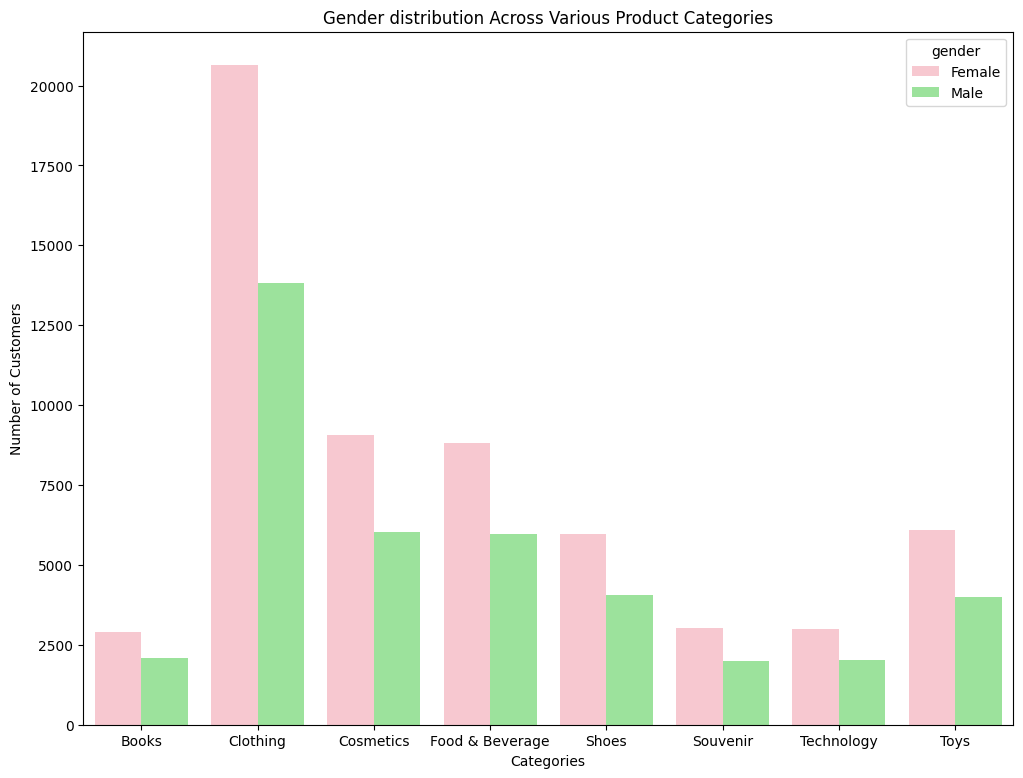

In [ ]:
# Gender distribution across different product categories

df_genderXcategory = df.groupby(['gender', 'category']).size().reset_index(name = 'count')
df_genderXcategory
plt.figure(figsize=(12,9))

sns.barplot(x='category', y='count', hue= 'gender', data=df_genderXcategory, palette = ['pink', 'lightgreen'])
plt.title('Gender distribution Across Various Product Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Customers')
plt.show()

# **Purchase History**

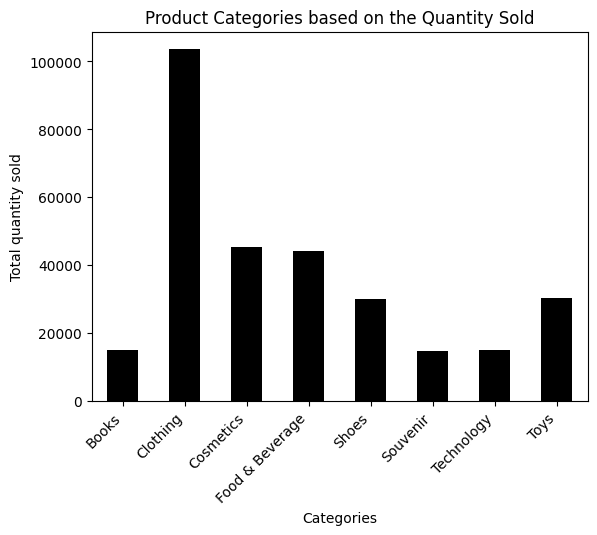

In [ ]:
# Product categories based on the quantity sold

df_categoryXquantity = df.groupby('category')['quantity'].sum()
df_categoryXquantity
df_categoryXquantity.sort_index().plot(kind = 'bar')
plt.title('Product Categories based on the Quantity Sold')
plt.xlabel('Categories')
plt.ylabel('Total quantity sold')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

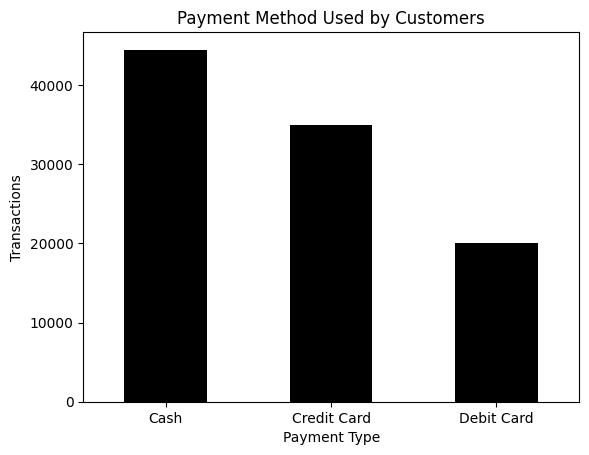

Total payment made by Cash: 44447
Total payment made by Credit Card: 34931
Total payment made by Debit Card: 20079


In [ ]:
# Total transaction made by payment method

df_priceXpayment_method = df.groupby('payment_method')['price'].count()
df_priceXpayment_method.sort_index().plot(kind = 'bar')
plt.title('Payment Method Used by Customers')
plt.xlabel('Payment Type')
plt.ylabel('Transactions')
plt.xticks(rotation = 0)
plt.show()
for i, j in df_priceXpayment_method.items():
  print(f"Total payment made by {i}: {j}")

# **behaviore**

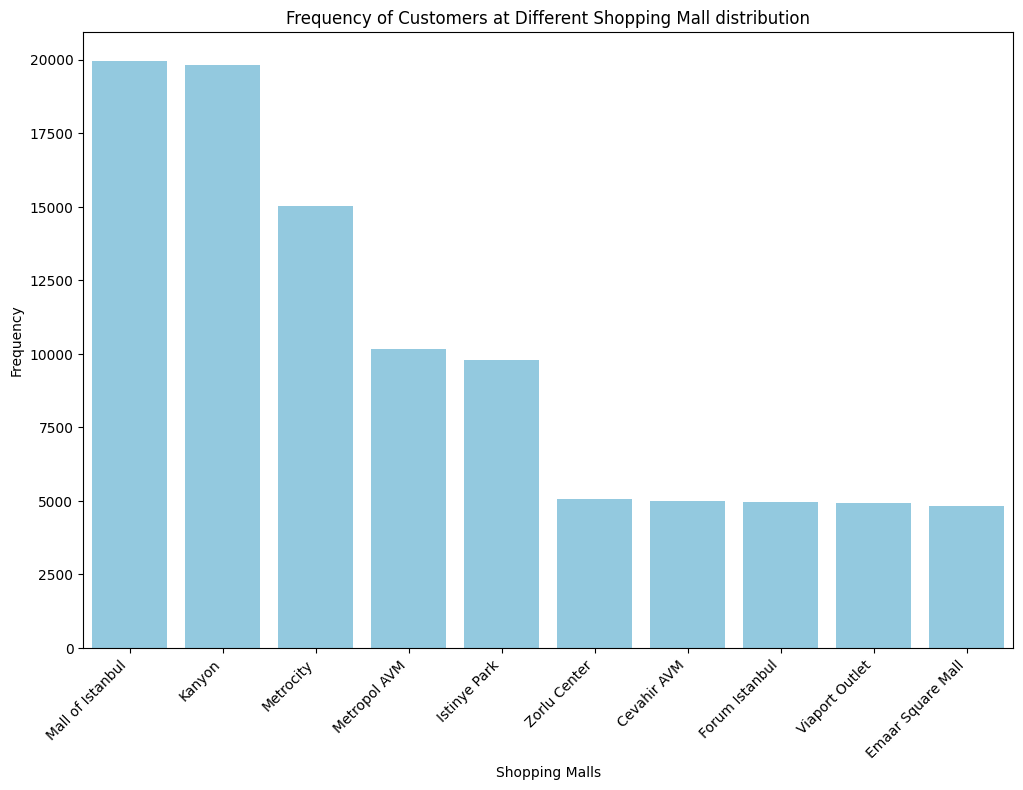

In [ ]:
# Shopping Mall distribution. How frequently do customers shop at different shopping malls?

df_shopping_mall = df['shopping_mall'].value_counts()
df_shopping_mall
plt.figure(figsize = (12,8))

sns.barplot(x=df_shopping_mall.index, y=df_shopping_mall.values, color = 'skyblue')

plt.xlabel('Shopping Malls')
plt.ylabel('Frequency')
plt.title('Frequency of Customers at Different Shopping Mall distribution')
plt.xticks(rotation = 45, ha = 'right')
plt.show()


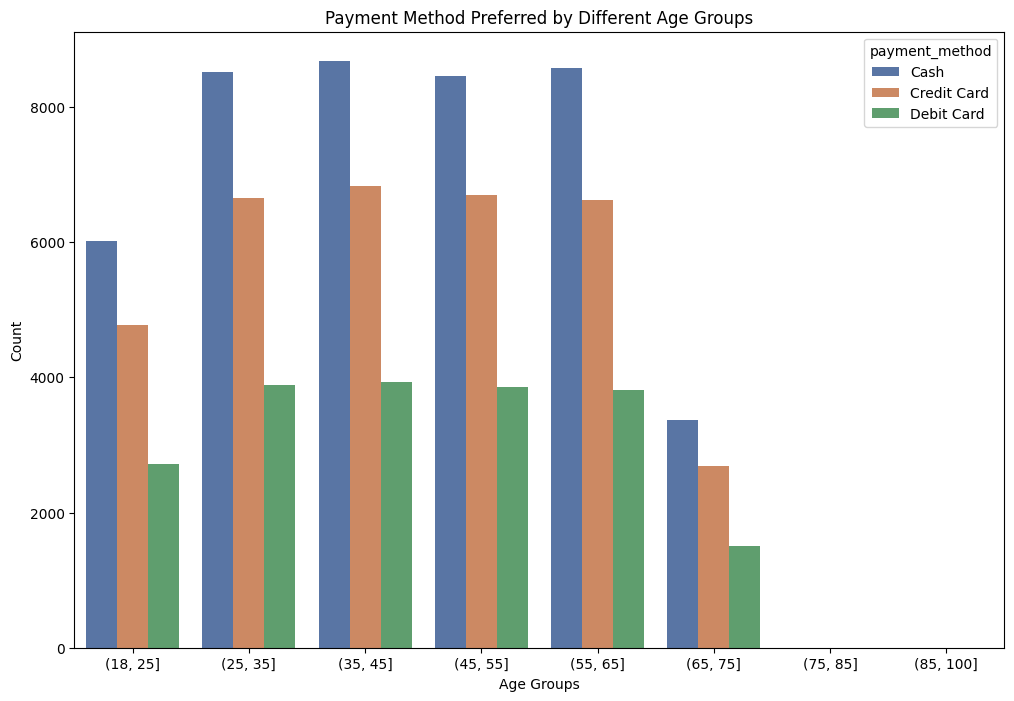

In [ ]:
# Are there specific payment methods preferred by different age groups?
df_ageXpayment = df.groupby(['age_group', 'payment_method']).size().reset_index(name = 'count')
df_ageXpayment

plt.figure(figsize = (12,8))
sns.barplot(x= 'age_group', y = 'count', hue = 'payment_method', data = df_ageXpayment,  palette = 'deep')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Payment Method Preferred by Different Age Groups')
plt.show()

# **Trends permonth in this years**

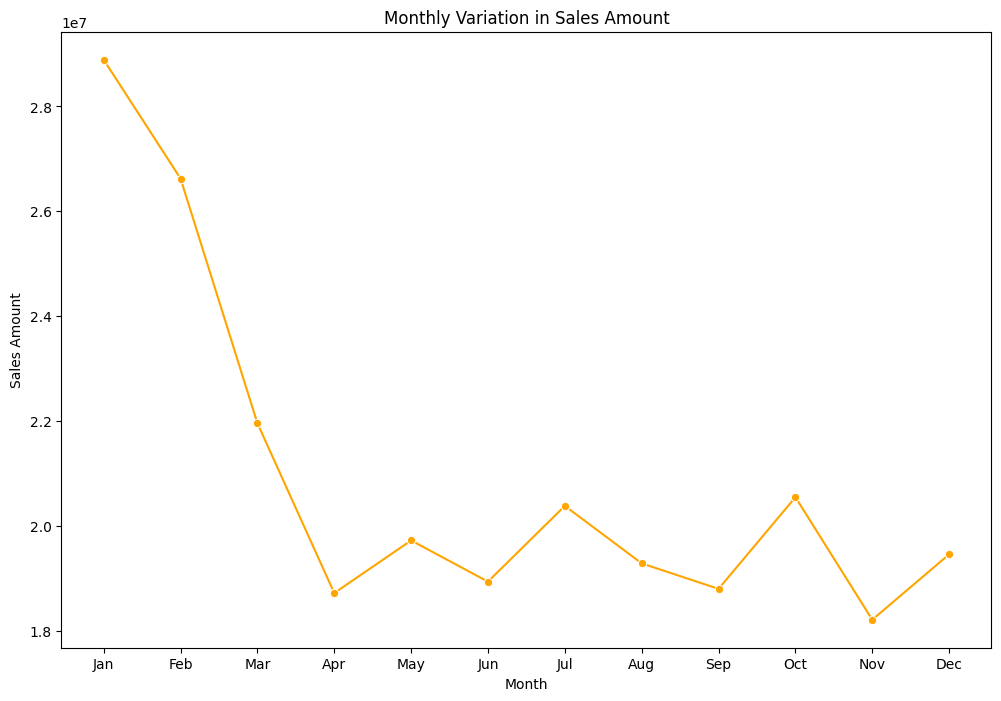

In [ ]:
#Analyzing the monthly variation in sales volume.(of all year)

df['sales_amount'] = df['quantity'] * df['price']

df['invoice_date'] = pd.to_datetime(df['invoice_date'], format = '%d/%m/%Y') #convert invoice date to date time format

df['month'] = df['invoice_date'].dt.month

monthly_sales_amount = df.groupby('month')['sales_amount'].sum()

plt.figure(figsize= (12,8))
sns.lineplot(x=monthly_sales_amount.index, y=monthly_sales_amount.values, marker = 'o', color = 'orange')
plt.title('Monthly Variation in Sales Amount')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

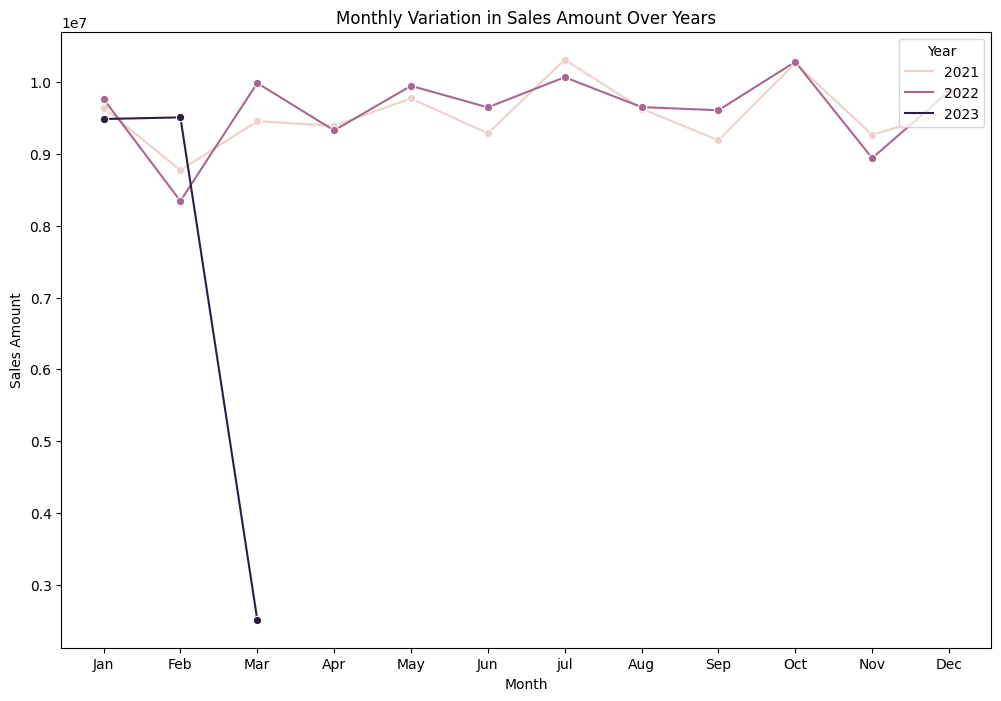

In [ ]:
#Analyzing the monthly variation in sales volume.(of each year)
df['year'] = df['invoice_date'].dt.year
monthly_sales_amount = df.groupby(['year','month'], as_index = False).agg({'sales_amount':'sum'})

plt.figure(figsize=(12,8))
sns.lineplot(x = 'month', y = 'sales_amount', hue = 'year', data = monthly_sales_amount, marker='o')
plt.title('Monthly Variation in Sales Amount Over Years')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.legend(title = 'Year', loc='upper right')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

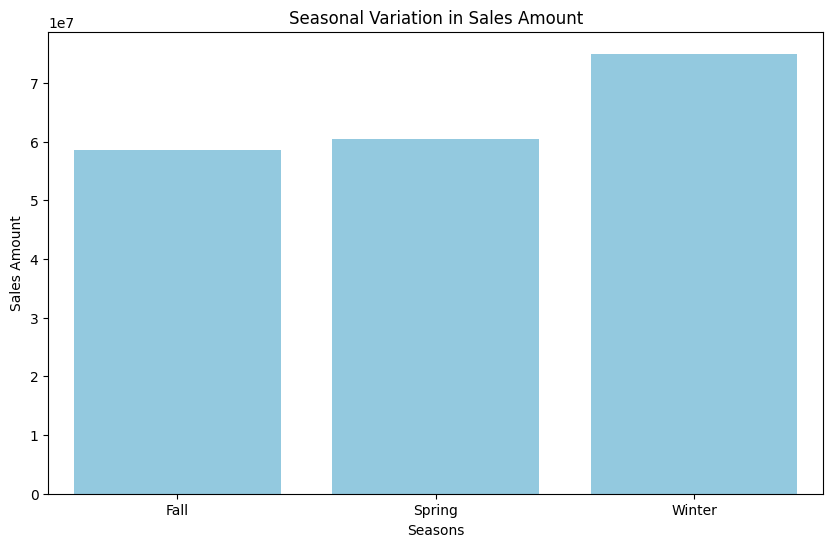

In [ ]:
#Identify any significant seasonal trends or patterns in customer shopping behavior.

def map_to_season(month):
  if month in [12, 1 , 2]:
    return 'Winter'
  elif month in [3,4,5]:
    return 'Spring'
  elif month in [6,7,8]:
    return 'Fall'

df['seasons'] = df['month'].apply(map_to_season)

seasonal_sales = df.groupby('seasons')['sales_amount'].sum()

plt.figure(figsize=(10,6))
sns.barplot(x=seasonal_sales.index, y=seasonal_sales.values, color= 'skyblue')
plt.title('Seasonal Variation in Sales Amount')
plt.xlabel('Seasons')
plt.ylabel('Sales Amount')
plt.show()
